# Idea: sum of N waves with phase shift

## Result:

from the internet:

$$ \sum_{n=1}^{N} \cos(wt + n \phi) = \frac{\sin(N \phi)}{\sin(\phi / 2)} \cos(wt + \frac{N+1}{2} \phi ) $$

## Prove the result

We know from complex things:

$$ \cos(x) = \frac{e^{ix} + e^{-ix}}{2} $$

so in our case:

$$ \cos(wt + n\phi) = \frac{e^{i(wt + n \phi)} + e^{-i(wt + n\phi)}}{2} $$

$$ \sum_{n=1}^{N} \cos(wt + n\phi) = \frac{1}{2} \sum_{n=1}^N e^{i(wt + n \phi)} + e^{-i(wt + n\phi)}$$

Have no idea how to convolute this

But computers don't care

We can simply sum up cosines

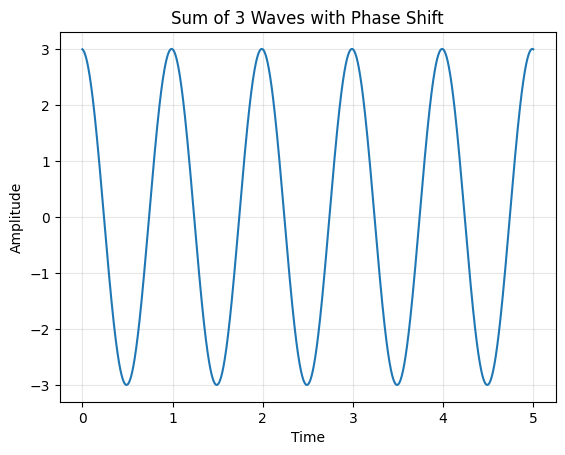

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

import matplotlib.animation as animation

def base_wave(n, t, w, phi):
    # t, w, phi = sp.symbols('t w phi')
    return np.cos(w * t + n * phi)

def sum_of_waves(N, t, w, phi):
    # t, w, phi = sp.symbols('t w phi')
    total = 0
    for n in range(1, N + 1):
        total += base_wave(n, t, w, phi)
    return total

def plot_waves(N, t_values, w, phi):
    # t = sp.symbols('t')

    wave_values = [sum_of_waves(N, tv, w, phi) for tv in t_values]
    
    plt.plot(t_values, wave_values)
    plt.title(f'Sum of {N} Waves with Phase Shift')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(alpha=0.3)
    # plt.show()

t_values = np.linspace(0, 5, 2000)
w = 2 * np.pi
phi = np.pi / 100

plot_waves(3, t_values, w, phi)

def update(frame):
    line.set_ydata([sum_of_waves(N, tv + frame * 0.1, w, phi) for tv in t_values])
    return line,

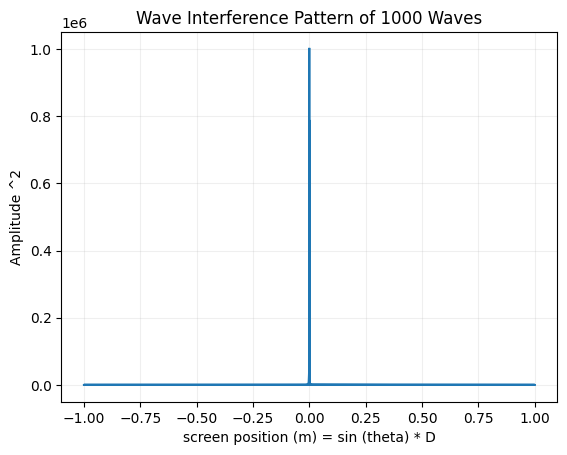

<Figure size 640x480 with 0 Axes>

In [7]:
d = 1e-6
wavelength = 589e-9  # Wavelength in meters
angular_amplitude = 0
N = 1000  # Number of waves
screen_distance = 1.0  # Distance to screen in metersz

def phase_difference(theta, d=d, wavelength=wavelength):
    return (2 * np.pi * d * np.sin(theta) / wavelength)

def wave_eq(theta, wave_number, d=d, wavelength=wavelength):
    return np.cos( angular_amplitude + ((-1)**wave_number) * wave_number*0.5*phase_difference(theta, d, wavelength))

theta_values = np.linspace(-2*np.pi, 2*np.pi, 20000)

n_waves = []
for wave_number in range(0, N):
    n_waves.append( wave_eq(theta_values, wave_number, d, wavelength) )

wave_values = sum(n_waves)

plt.plot(screen_distance* np.sin(theta_values), wave_values**2)
plt.title('Wave Interference Pattern of {} Waves'.format(N))
plt.xlabel('screen position (m) = sin (theta) * D')
plt.ylabel('Amplitude ^2')
plt.grid(alpha=0.2)
plt.show()

plt.savefig('{} waves.pdf'.format(N))

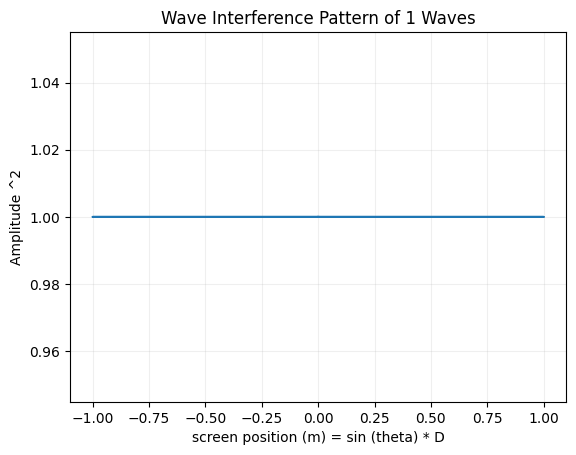

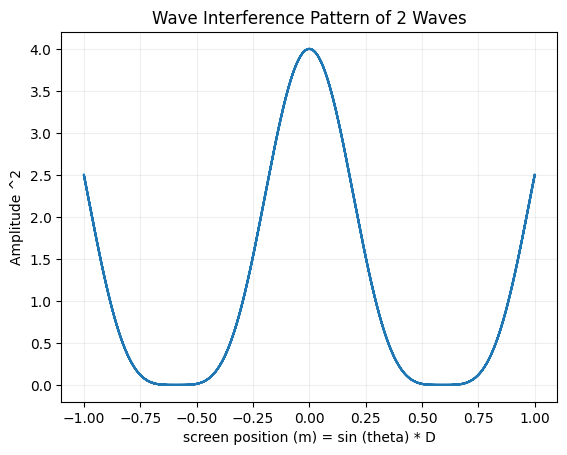

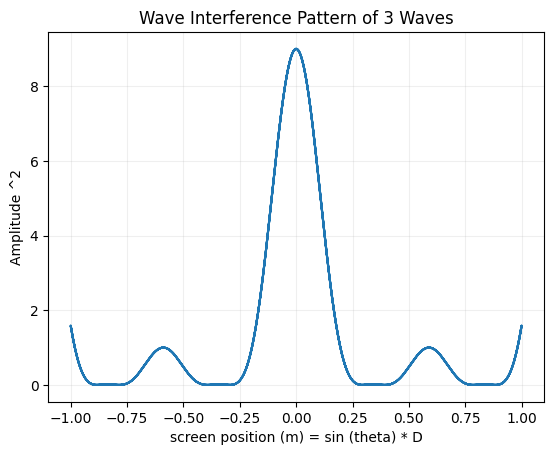

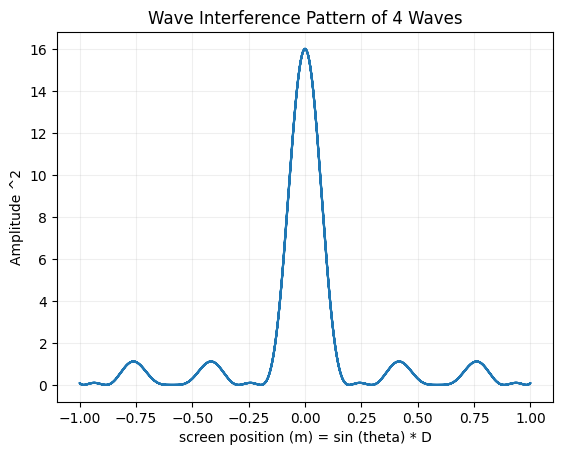

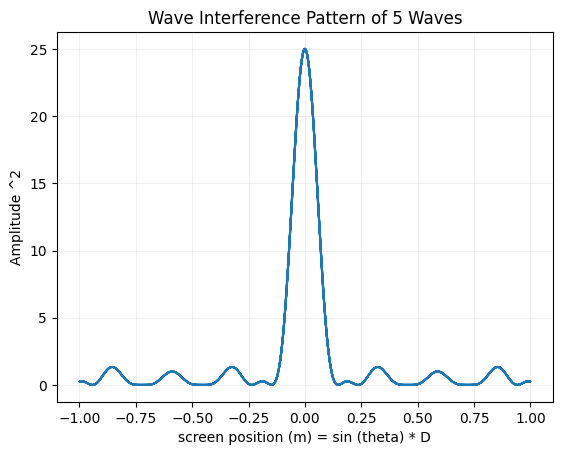

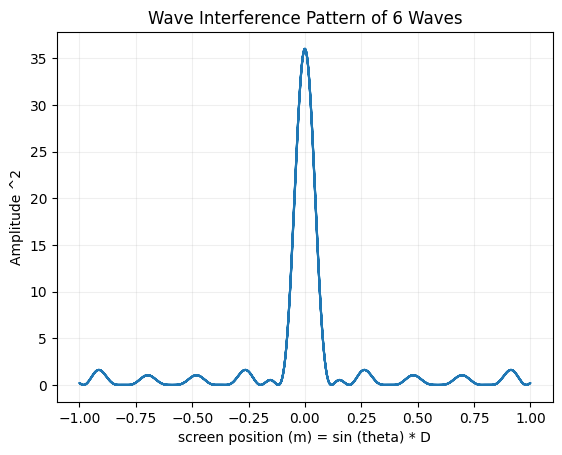

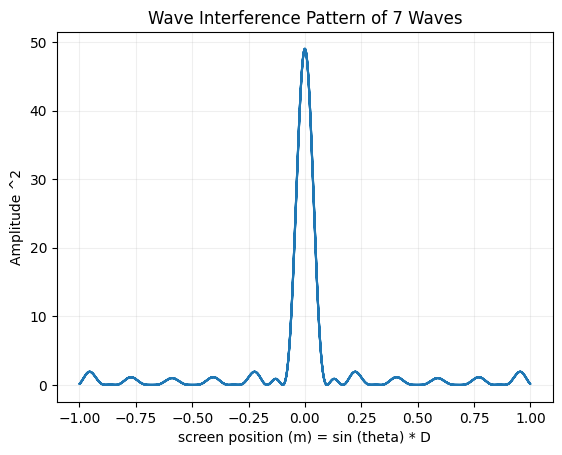

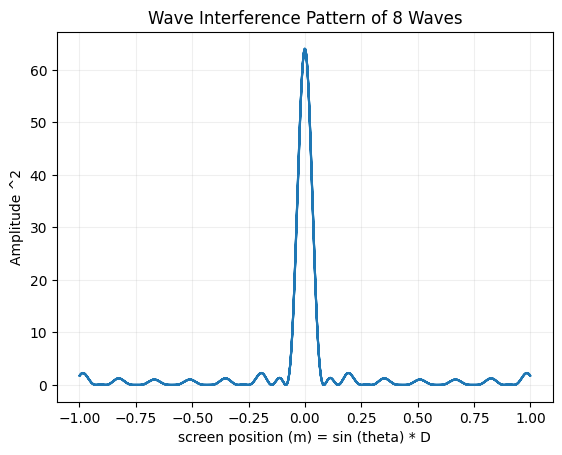

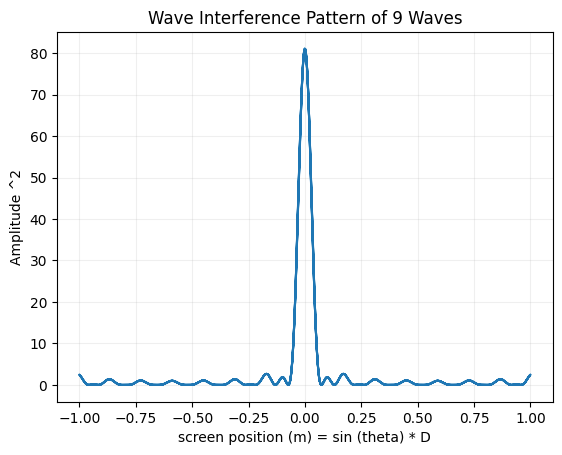

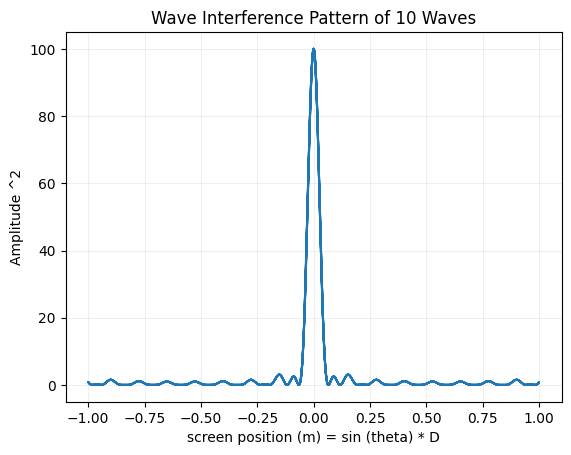

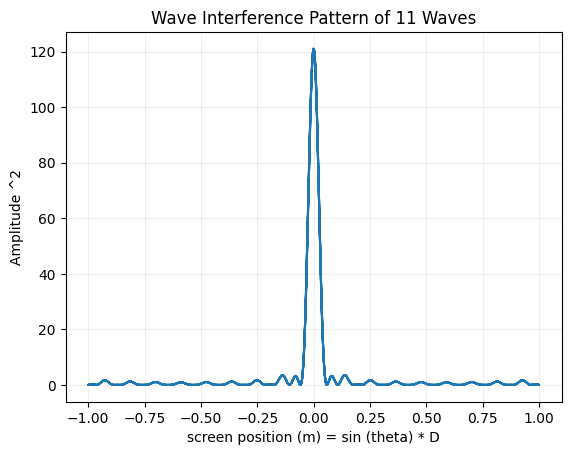

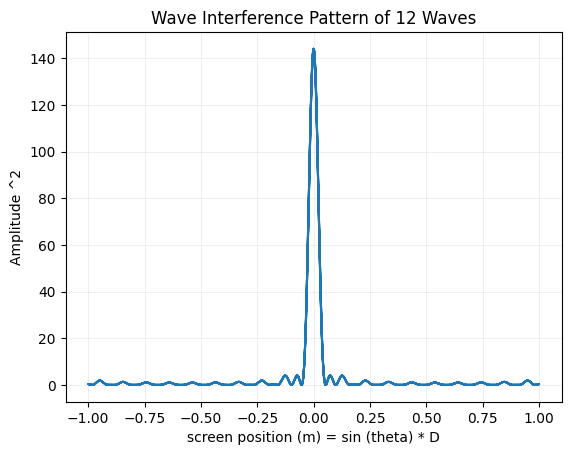

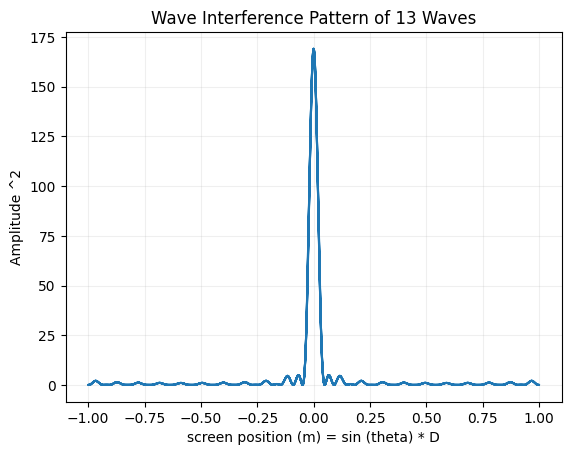

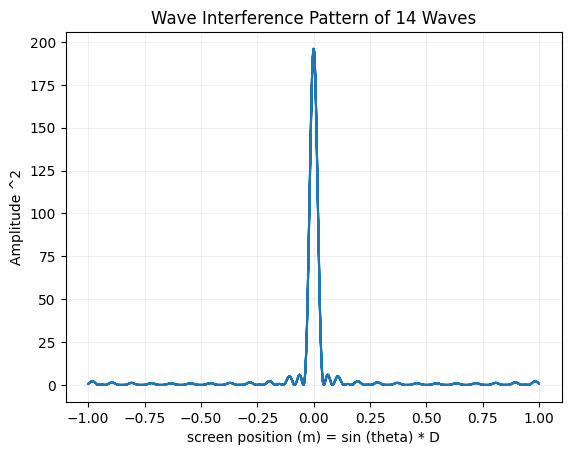

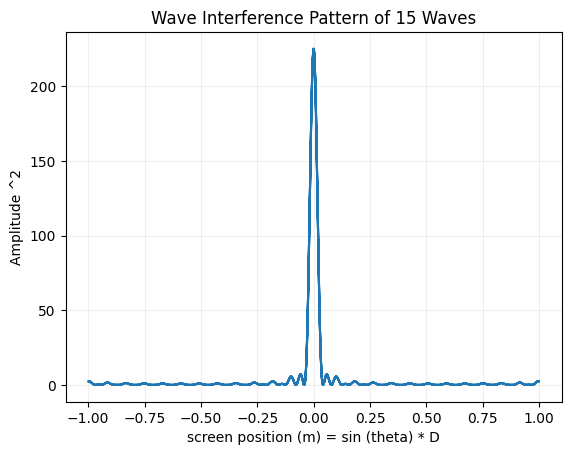

<Figure size 640x480 with 0 Axes>

In [8]:
d = 1e-6
wavelength = 589e-9  # Wavelength in meters
angular_amplitude = 0
N = 15  # Number of waves
screen_distance = 1.0  # Distance to screen in metersz

def phase_difference(theta, d=d, wavelength=wavelength):
    return (2 * np.pi * d * np.sin(theta) / wavelength)

def wave_eq(theta, wave_number, d=d, wavelength=wavelength):
    return np.cos( angular_amplitude + ((-1)**wave_number) * wave_number*0.5*phase_difference(theta, d, wavelength))

def calculate_wave_values(theta_values, N, d, wavelength):
    n_waves = []
    for wave_number in range(0, N):
        n_waves.append( wave_eq(theta_values, wave_number, d, wavelength) )
    return sum(n_waves)

# theta_values = np.linspace(-2*np.pi, 2*np.pi, 20000)

# n_waves = []
# for wave_number in range(0, N):
#     n_waves.append( wave_eq(theta_values, wave_number, d, wavelength) )
# wave_values = sum(n_waves)

for n_current in range(1, N+1):
    wave_values = calculate_wave_values(theta_values, n_current, d, wavelength)

    plt.plot(screen_distance* np.sin(theta_values), wave_values**2)
    plt.title('Wave Interference Pattern of {} Waves'.format(n_current))
    plt.xlabel('screen position (m) = sin (theta) * D')
    plt.ylabel('Amplitude ^2')
    plt.grid(alpha=0.2)
    plt.show()

    plt.savefig('{} waves.png'.format(n_current))

In [5]:
for i in range(1, 6):
    print(i)

1
2
3
4
5


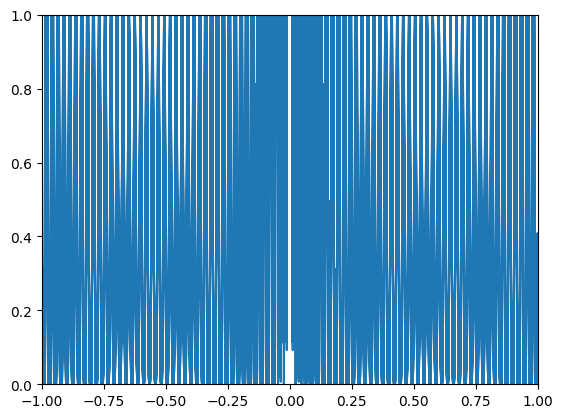

In [6]:
d = 1e-6
wavelength = 589e-9  # Wavelength in meters
angular_amplitude = 0
N = 1  # Number of waves
screen_distance = 1.0  # Distance to screen in metersz

def phase_difference(theta, d=d, wavelength=wavelength):
    return (2 * np.pi * d * np.sin(theta) / wavelength)

def wave_eq(theta, wave_number, d=d, wavelength=wavelength):
    return np.cos( angular_amplitude + ((-1)**wave_number) * wave_number*0.5*phase_difference(theta, d, wavelength))

def calculate_wave_values(theta_values, N, d, wavelength):
    n_waves = []
    for wave_number in range(0, N):
        n_waves.append( wave_eq(theta_values, wave_number, d, wavelength) )
    return sum(n_waves)

fig, ax = plt.subplots()

theta_values = np.linspace(-2*np.pi, 2*np.pi, 20000)
wave_values = calculate_wave_values(theta_values, N, d, wavelength)**2
line, = ax.plot(theta_values, wave_values)
ax.set_xlim(-1, 1)
ax.set_ylim(0, 1)

def animate(i):
    line.set_xdata( screen_distance* np.sin(theta_values) )
    line.set_ydata( calculate_wave_values(theta_values, i+1, d, wavelength)**2 )
    return line,

ani = animation.FuncAnimation(
    fig, animate, interval=1000, blit=True, save_count=50)


ani.save("movie.mp4")

# def update(frame):

#     line.set_xdata( screen_distance* np.sin(theta_values) )
#     line.set_ydata( calculate_wave_values(theta_values, N, d, wavelength)**2 )
